In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator

## Load data

In [8]:
phat_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phat_catalog.csv')
phast_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phast_catalog.csv')

# Interpolate PHAT  and phast data using the RGB and AGB stars

In [9]:
# Get complete isochrone and exclude F814W > 23 mag
complete_isochrone_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/CMD37_csvs/complete_isochrone_table.csv')
rgb_agb_isochrone = complete_isochrone_df[(complete_isochrone_df['F814W_appmag'] < 23)]

# interpolate 
# Create a 2D array of F814W and F475W-F814W magnitudes from rgb_agb_isochrone
cmd_arr = rgb_agb_isochrone[['F814W_appmag', 'F475W_appmag-F814W_appmag']].values

# Mini,int_IMF,Mass,logL,logTe,logg,
# Create a LinearNDInterpolator object with 'MH' as the values
interp_MH = LinearNDInterpolator(cmd_arr, rgb_agb_isochrone['MH'], fill_value=-99.0)
interp_Mini = LinearNDInterpolator(cmd_arr, rgb_agb_isochrone['Mini'], fill_value=-99.0)
interp_int_IMF = LinearNDInterpolator(cmd_arr, rgb_agb_isochrone['int_IMF'], fill_value=-99.0)
interp_Mass = LinearNDInterpolator(cmd_arr, rgb_agb_isochrone['Mass'], fill_value=-99.0)
interp_logL = LinearNDInterpolator(cmd_arr, rgb_agb_isochrone['logL'], fill_value=-99.0)
interp_logTe = LinearNDInterpolator(cmd_arr, rgb_agb_isochrone['logTe'], fill_value=-99.0)
interp_logg = LinearNDInterpolator(cmd_arr, rgb_agb_isochrone['logg'], fill_value=-99.0)



# Create a 2D array of f814w_vega and f475w-f814w magnitudes from phat_df
phat_df['f475w-f814w_ecorr'] = phat_df['f475w_vega_ecorr'] - phat_df['f814w_vega_ecorr']
# phat_df['f475w-f814w_vega'] = phat_df['f475w_vega'] - phat_df['f814w_vega']

# PHAST catalog color magnitude diagram values
filtered_arr = phat_df[['f814w_vega_ecorr', 'f475w-f814w_ecorr']].values
# filtered_arr = phat_df[['f814w_vega', 'f475w-f814w_vega']].values


# Interpolate the 'MH' values for each row in phat_df
interpolated_MH = interp_MH(filtered_arr)
interpolated_Mini = interp_Mini(filtered_arr)
interpolated_int_IMF = interp_int_IMF(filtered_arr)
interpolated_Mass = interp_Mass(filtered_arr)
interpolated_logL = interp_logL(filtered_arr)
interpolated_logTe = interp_logTe(filtered_arr)
interpolated_logg = interp_logg(filtered_arr)

# Add the interpolated 'MH' values as a new column in phat_df
phat_df['interpolated_MH'] = interpolated_MH
phat_df['interpolated_Mini'] = interpolated_Mini
phat_df['interpolated_int_IMF'] = interpolated_int_IMF
phat_df['interpolated_Mass'] = interpolated_Mass
phat_df['interpolated_logL'] = interpolated_logL
phat_df['interpolated_logTe'] = interpolated_logTe
phat_df['interpolated_logg'] = interpolated_logg

print(phat_df.shape)
# print(phat_df.head(15))

phat_df = phat_df[phat_df['interpolated_MH'] != -99.0].dropna()
print(phat_df.shape)
# print(phat_df.head(15))

phat_df.to_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phat_rgb_agb_dataset.csv', index=False)

(6152688, 24)
    Unnamed: 0         ra        dec  f475w_vega  f475w_snr  f475w_crowd  \
0            0  10.772439  41.203526      15.754      324.2        0.000   
1            1  10.861762  41.237756      15.986       80.1        0.019   
2            2  10.763488  41.193805      15.836      253.7        0.004   
3            3  10.840829  41.205419      16.755      127.7        0.000   
4            4  10.786556  41.173557      16.706      100.7        0.027   
5            5  10.857114  41.245740      16.289      245.9        0.001   
6            6  10.821127  41.234318      16.393      168.3        0.003   
7            7  10.703021  41.202852      19.184      526.7        0.000   
8            8  10.835287  41.209361      17.187       99.7        0.045   
9            9  10.825447  41.192824      17.721       29.3        0.000   
10          10  10.824585  41.187049      19.934      528.4        0.001   
11          11  10.835137  41.214534      20.598      305.9        0.009  

In [10]:
phat_df.columns

Index(['Unnamed: 0', 'ra', 'dec', 'f475w_vega', 'f475w_snr', 'f475w_crowd',
       'f475w_sharp', 'f475w_flag', 'f814w_vega', 'f814w_snr', 'f814w_crowd',
       'f814w_sharp', 'f814w_flag', 'f814w_vega_ecorr', 'f475w_vega_ecorr',
       'f475w-f814w_ecorr', 'f475w_vega-f814w_vega', 'interpolated_MH',
       'interpolated_Mini', 'interpolated_int_IMF', 'interpolated_Mass',
       'interpolated_logL', 'interpolated_logTe', 'interpolated_logg'],
      dtype='object')

# Plot CMD

<AxesSubplot:xlabel='ra', ylabel='dec'>

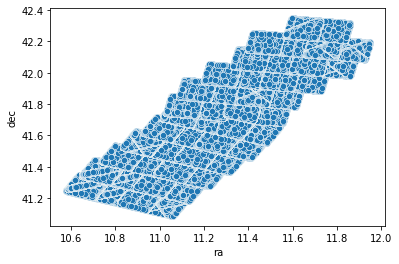

In [12]:
sns.scatterplot(data=phat_df, x='ra', y='dec', hue='interpolated_MH', palette='magma', alpha=0.5, s=10)

In [16]:
import seaborn as sns
sns.scatterplot(data=phat_df[phat_df['interpolated_MH'] <= 0.6], x='f475w-f814w_ecorr', y='f814w_vega_ecorr', hue='interpolated_MH', palette='magma', alpha=0.5, s=10)
sns.kdeplot(data=phat_df[phat_df['interpolated_MH'] <= 0.6], x='f475w-f814w_ecorr', y='f814w_vega_ecorr', levels=10, colors='k')
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/phat_agb_rgb_cmd.jpeg', format='jpeg')


KeyboardInterrupt: 

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
filtered_df = phat_df[phat_df['interpolated_MH'] <= 0.6]
sns.scatterplot(data=filtered_df, x='f475w-f814w_ecorr', y='f814w_vega_ecorr', hue='interpolated_MH', palette='magma', alpha=0.5, s=10)
